### Farid Abdalla & Noah Graells

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data_train = np.genfromtxt('ex1-data-train.csv', delimiter=',')
data_test = np.genfromtxt('ex1-data-test.csv', delimiter=',')

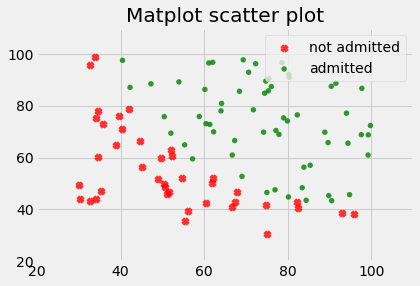

In [33]:
# Create plot
colors = ("red", "green")
markers = ('x', 'o')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([20, 110])
ax.set_ylim([20, 110])

not_admitted = np.array([data[:2] for data in data_train if data[2] == 0.0])
admitted = np.array([data[:2] for data in data_train if data[2] == 1.0])

not_admitted_graph = ax.scatter(not_admitted[:, 0], not_admitted[:, 1], alpha=0.8, c=colors[0], marker=markers[0], edgecolors='none', s=30)
admitted_graph = ax.scatter(admitted[:, 0], admitted[:, 1], alpha=0.8, c=colors[1], marker=markers[1], edgecolors='none', s=30)

plt.title('Matplot scatter plot')
plt.legend([not_admitted_graph, admitted_graph], ["not admitted", "admitted"], loc=1)
plt.show()

In [34]:
# C0 = not admitted
# C1 = admitted
PC0 = len(not_admitted) / len(data_train)
PC1 = len(admitted) / len(data_train)
print("Probability of not admitted :", PC0)
print("Probability of admitted :", PC1)

Probability of not admitted : 0.4
Probability of admitted : 0.6


## Histograms

Text(0.5, 1.0, 'Histogram of x2 for admitted students')

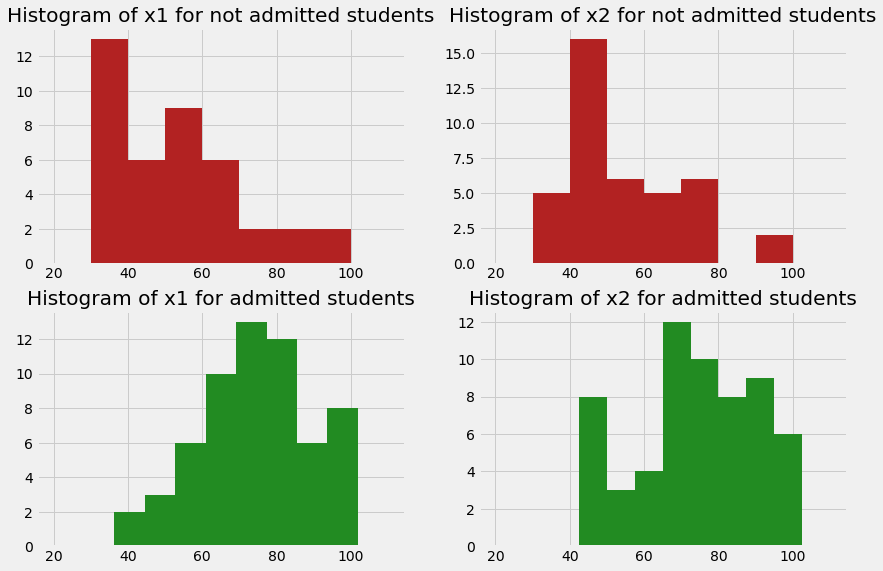

In [35]:
plt.subplots_adjust(left=0.125, right=2, bottom=0.1, top=1.9, wspace=0.2, hspace=0.2)
plt.subplot(2, 2, 1)
hist_x1_C0, edge_x1_C0, _ = plt.hist(not_admitted[:, 0], range=[20, 110], bins='auto', color="firebrick")
plt.title("Histogram of x1 for not admitted students")

plt.subplot(2, 2, 2)
hist_x2_C0, edge_x2_C0, _ = plt.hist(not_admitted[:, 1], range=[20, 110], bins='auto', color='firebrick')
plt.title("Histogram of x2 for not admitted students")

plt.subplot(2, 2, 3)
hist_x1_C1, edge_x1_C1, _ = plt.hist(admitted[:, 0], range=[20, 110], bins='auto',  color='forestgreen')
plt.title("Histogram of x1 for admitted students")

plt.subplot(2, 2, 4)
hist_x2_C1, edge_x2_C1, _ = plt.hist(admitted[:, 1], range=[20, 110], bins='auto', color='forestgreen')
plt.title("Histogram of x2 for admitted students")

In [36]:
def likelihoodHist(x, histValues, edgeValues):
    last_edge = edgeValues[0]
    for number, edge in zip(histValues, edgeValues[1:]):
        if x > last_edge and x <= edge:
            return number / sum(histValues)
        last_edge = edge

In [37]:
def p_x1_C0(x):
    return likelihoodHist(x, hist_x1_C0, edge_x1_C0)

def p_x2_C0(x):
    return likelihoodHist(x, hist_x2_C0, edge_x2_C0)

def p_x1_C1(x):
    return likelihoodHist(x, hist_x1_C1, edge_x1_C1)

def p_x2_C1(x):
    return likelihoodHist(x, hist_x2_C1, edge_x2_C1)

In [38]:
def bayes_classifier_x1(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x1"""
    return 0 if p_x1_C0(x1) * PC0 > p_x1_C1(x1) * PC1 else 1

def bayes_classifier_x2(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x2"""
    return 0 if p_x2_C0(x2) * PC0 > p_x2_C1(x2) * PC1 else 1

def bayes_classifier_x1_x2(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x1 and x2"""
    return 0 if (p_x1_C0(x1) * PC0 * p_x2_C0(x2) * PC0) > (p_x1_C1(x1) * PC1 * p_x2_C1(x2) * PC1) else 1

In [39]:
def control(classifier_function):
    nb_correct = 0
    for x1, x2, correct in data_test:
        guess = classifier_function(x1, x2)
        nb_correct += 1 if guess == correct else 0
    print(f"Performance : {nb_correct / len(data_test)}")

In [40]:
classifiers = [bayes_classifier_x1, bayes_classifier_x2, bayes_classifier_x1_x2]
for classifier in classifiers:
    print(classifier.__doc__, ":")
    control(classifier)

Bayes with feature x1 :
Performance : 0.62
Bayes with feature x2 :
Performance : 0.74
Bayes with feature x1 and x2 :
Performance : 0.89


The best result is with two features. With x2 we can say a bit more precisely than x1 in which class we belongs to.

## Univariate Gaussian distribution

In [41]:
from scipy.stats import norm
mean_x1_C0 = np.mean(not_admitted[:, 0])
var_x1_C0  = np.var(not_admitted[:, 0])

mean_x1_C1 = np.mean(admitted[:, 0])
var_x1_C1  = np.var(admitted[:, 0])

mean_x2_C0 = np.mean(not_admitted[:, 1])
var_x2_C0  = np.var(not_admitted[:, 1])

mean_x2_C1 = np.mean(admitted[:, 1])
var_x2_C1  = np.var(admitted[:, 1])

In [42]:
def plt_gaussian(means, sigmas, mins, maxs, title):
    
    fig, ax = plt.subplots(2, 2, figsize=(9,6))
    plt.subplots_adjust(left=0.125, right=2, bottom=0.1, top=1.9, wspace=0.2, hspace=0.2)
    for i, (mu, sigma, x1, x2, title) in enumerate(zip (means, sigmas, mins, maxs, titles)):
        b = 0 if i < 2 else 1
        z1 = ( x1 - mu ) / sigma
        z2 = ( x2 - mu ) / sigma
        x = np.arange(z1, z2, 0.001) # range of x in spec
        x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
        # mean = 0, stddev = 1, since Z-transform was calculated
        y = norm.pdf(x,0,1)
        y2 = norm.pdf(x_all,0,1)
        # build the plot
        plt.style.use('fivethirtyeight')
        ax[b, i % 2].plot(x_all,y2)

        ax[b, i % 2].fill_between(x,y,0, alpha=0.3, color='b')
        ax[b, i % 2].fill_between(x_all,y2,0, alpha=0.1)
        ax[b, i % 2].set_xlim([-4,4])
        ax[b, i % 2].set_xlabel('# of Standard Deviations Outside the Mean')
        ax[b, i % 2].set_yticklabels([])
        ax[b, i % 2].set_title(title)

    plt.show()

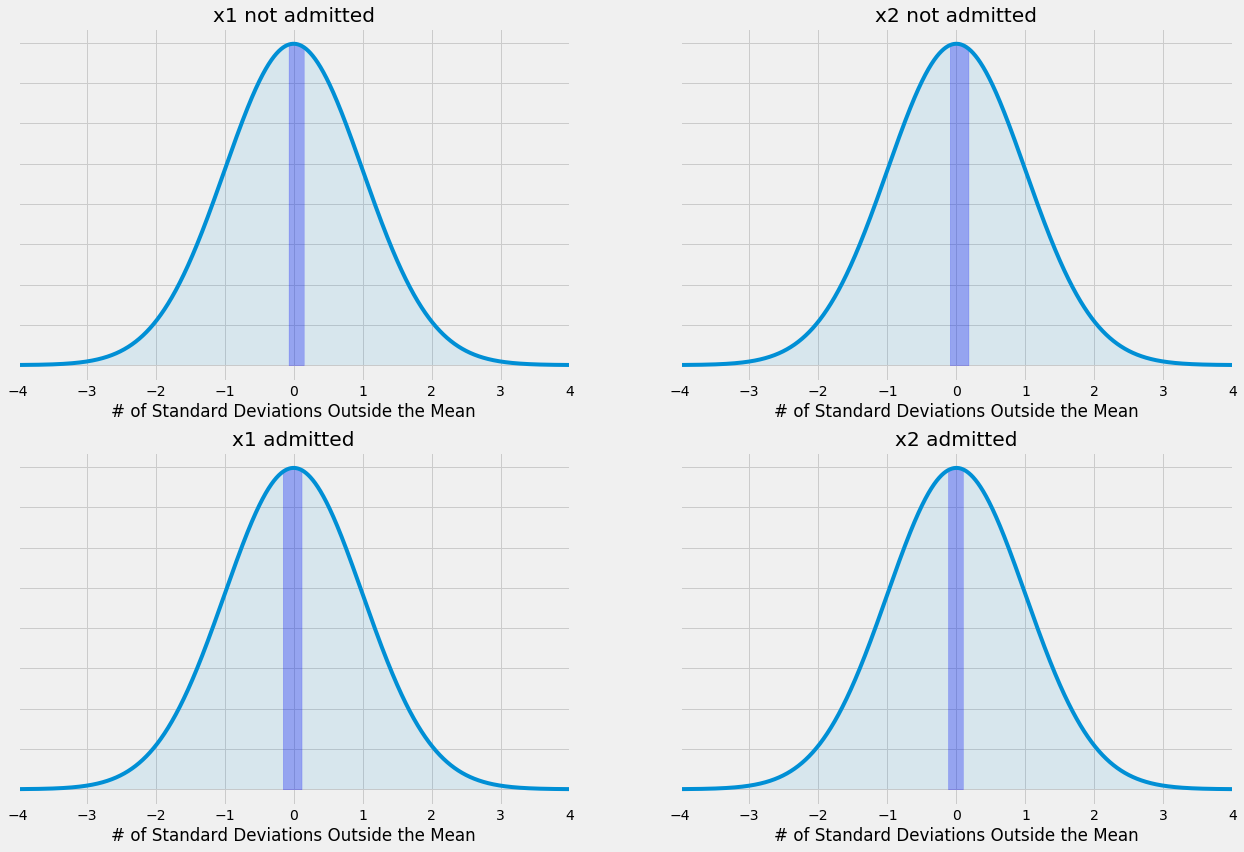

In [43]:
means = [mean_x1_C0, mean_x2_C0, mean_x1_C1, mean_x2_C1]
var = [var_x1_C0, var_x2_C0, var_x1_C1, var_x2_C1]
mins = [min(not_admitted[:, 0]), min(not_admitted[:, 1]), min(admitted[:, 0]), min(admitted[:, 1])]
maxs = [max(not_admitted[:, 0]), max(not_admitted[:, 1]), max(admitted[:, 0]), max(admitted[:, 1])]
titles = ["x1 not admitted", "x2 not admitted", "x1 admitted", "x2 admitted"]
plt_gaussian(means, var, mins, maxs, titles)

In [44]:
def likelihoodGaussian(x, mean, var):
    div = (2 * np.pi * var)**0.5
    exp = -1/(2*var) * (x - mean) ** 2
    return (1/div)*np.exp(exp)

In [45]:
def p_x1_C0(x):
    return likelihoodGaussian(x, mean_x1_C0, var_x1_C0)

def p_x2_C0(x):
    return likelihoodGaussian(x, mean_x2_C0, var_x2_C0)

def p_x1_C1(x):
    return likelihoodGaussian(x, mean_x1_C1, var_x1_C1)

def p_x2_C1(x):
    return likelihoodGaussian(x, mean_x2_C1, var_x2_C1)

In [46]:
def bayes_classifier_x1(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x1"""
    return 0 if p_x1_C0(x1) * PC0 > p_x1_C1(x1) * PC1 else 1

def bayes_classifier_x2(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x2"""
    return 0 if p_x2_C0(x2) * PC0 > p_x2_C1(x2) * PC1 else 1

def bayes_classifier_x1_x2(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x1 and x2"""
    return 0 if (p_x1_C0(x1) * PC0 * p_x2_C0(x2) * PC0) > (p_x1_C1(x1) * PC1 * p_x2_C1(x2) * PC1) else 1

In [47]:
def control(classifier_function):
    nb_correct = 0
    for x1, x2, correct in data_test:
        guess = classifier_function(x1, x2)
        nb_correct += 1 if guess == correct else 0
    print(f"Performance : {nb_correct / len(data_test)}")

In [48]:
classifiers = [bayes_classifier_x1, bayes_classifier_x2, bayes_classifier_x1_x2]
for classifier in classifiers:
    print(classifier.__doc__, ":")
    control(classifier)

Bayes with feature x1 :
Performance : 0.71
Bayes with feature x2 :
Performance : 0.72
Bayes with feature x1 and x2 :
Performance : 0.92
